In [1]:
import pandas as pd

# relevant file paths ----
path_input_groups = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/'
name_input_file_groups = 'Adm2_TC_Assignment_Recurrence.csv'

path_input_outcomevar = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Data-Observational/Output/'
name_input_file_outcomevar = 'Ghana_Stats_Rec_FINAL.csv'

path_output = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/02-Parallel-Trends-Analysis/'
name_output_file = 'Before_After_Outcome_Variable_Of_Interest.csv'

# path_input = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/01-TC-Assignment/'
# name_input_file = 'Final_Adm2_TC_Assignment.csv'
# path_input = '/Users/srilakshmi/Desktop/Thesis/04-Data-Analysis-Results/00-Data-Sources/00-Cloud-to-Street/01-District-level/Data-Observational/'
# name_input_file = 'Ghana_Stats_Rec_v2.csv'

In [2]:
# variable to use as outcome variable
var = 'pop_sum' # perc_pop, perc_floodarea

# load treatment-control data
assigned = pd.read_csv(path_input_groups+name_input_file_groups)

# load outcome variables data
df = pd.read_csv(path_input_outcomevar+name_input_file_outcomevar)
dfx = df[df['year'] < 2021]
dfx = dfx[dfx['year'] >= 2015]

# merge data together
x = assigned.merge(dfx, left_on='Region', right_on='admin2name')
treatment = x[x['Treatment'] == 0].groupby('year').mean()
control = x[x['Treatment'] == 1].groupby('year').mean()

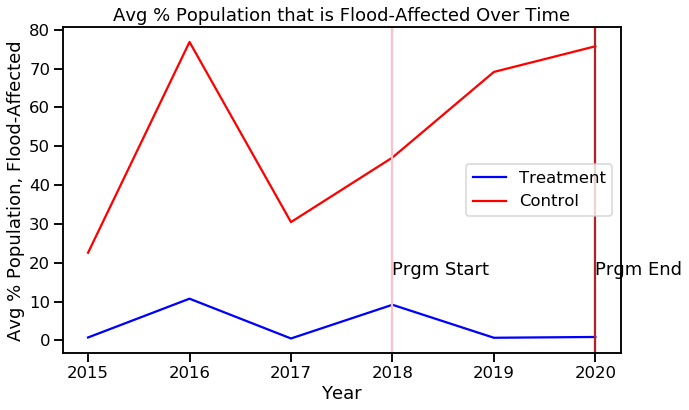

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# observe if parallel trends exist -----

sns.set_context("talk")
fig, ax = plt.subplots(figsize=(10, 6))

# plot treatment and control lines
sns.lineplot(x = treatment.index, y = treatment[var], label='Treatment',color='b')
sns.lineplot(x = control.index, y = control[var], label='Control', color='r')

# plot text
plt.title('Avg % Population that is Flood-Affected Over Time')
plt.xlabel('Year')
plt.ylabel('Avg % Population, Flood-Affected')
plt.axvline(2018, color='pink') # plot vertical line corresponding to treatment year
plt.axvline(2020, color='firebrick')
ymin, ymax = ax.get_ylim() # get yaxis range to label vertical lines in an appropriate location
plt.text(2018, (ymax - ymin)*0.2, 'Prgm Start')
plt.text(2020, (ymax - ymin)*0.2, 'Prgm End')

# include legend
plt.legend(loc='best')

In [4]:
# write relevant variables to disk -----

x = x[['Region', 'Treatment', 'year', 'perc_pop']]
x.to_csv(path_output+name_output_file, index = False)